## 说明
该版本为最初开发版本，使用黑龙江省的数据进行分析

# 环境准备

In [1]:
!pip install jstyleson folium

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# 数据扫描

In [2]:
# CSV读取
import csv

# 市级以上行政区列表
city_list = set()

with open('china_city_list.csv') as city_list_csv:
    reader = csv.DictReader(city_list_csv)
    for row in reader:
        city_list.add(row['City'])
        city_list.add(row['City_Admaster'])
        city_list.add(row['Province'])
        
city_list

{'七台河',
 '七台河市',
 '三亚',
 '三亚市',
 '三明',
 '三明市',
 '三门峡',
 '三门峡市',
 '上海',
 '上海市',
 '上饶',
 '上饶市',
 '东莞',
 '东莞市',
 '东营',
 '东营市',
 '中卫',
 '中卫市',
 '中山',
 '中山市',
 '临汾',
 '临汾市',
 '临沂',
 '临沂市',
 '临沧',
 '临沧市',
 '丹东',
 '丹东市',
 '丽水',
 '丽水市',
 '丽江',
 '丽江市',
 '乌兰察布',
 '乌兰察布市',
 '乌海',
 '乌海市',
 '乌鲁木齐',
 '乌鲁木齐市',
 '乐山',
 '乐山市',
 '九江',
 '九江市',
 '云南',
 '云浮',
 '云浮市',
 '亳州',
 '亳州市',
 '伊春',
 '伊春市',
 '伊犁',
 '伊犁哈萨克自治州',
 '佛山',
 '佛山市',
 '佳木斯',
 '佳木斯市',
 '保定',
 '保定市',
 '保山',
 '保山市',
 '信阳',
 '信阳市',
 '儋州',
 '儋州市',
 '克孜勒苏柯尔克孜',
 '克孜勒苏柯尔克孜自治州',
 '克拉玛依',
 '克拉玛依市',
 '六安',
 '六安市',
 '六盘水',
 '六盘水市',
 '兰州',
 '兰州市',
 '兴安盟',
 '内江',
 '内江市',
 '内蒙古',
 '凉山',
 '凉山彝族自治州',
 '包头',
 '包头市',
 '北京',
 '北京市',
 '北海',
 '北海市',
 '十堰',
 '十堰市',
 '南京',
 '南京市',
 '南充',
 '南充市',
 '南宁',
 '南宁市',
 '南平',
 '南平市',
 '南昌',
 '南昌市',
 '南通',
 '南通市',
 '南阳',
 '南阳市',
 '博尔塔拉',
 '博尔塔拉蒙古自治州',
 '厦门',
 '厦门市',
 '双鸭山',
 '双鸭山市',
 '台州',
 '台州市',
 '合肥',
 '合肥市',
 '吉安',
 '吉安市',
 '吉林',
 '吉林市',
 '吐鲁番',
 '吐鲁番地区',
 '吐鲁番市',
 '吕梁',
 '吕梁市',
 '吴忠',
 '吴忠市',
 '周口',
 '周口市',
 '呼伦贝尔',
 '呼

In [3]:
# 文件扫描
import glob
# JSON读取（数据集不是标准JSON所以不用自带的json库）
import jstyleson
# 集合数据结构
import collections
# 正则表达式
import re

In [4]:
print("扫描所有数据:")
files = glob.glob('data/*.json')
files

扫描所有数据:


['data\\上海市确诊病例活动轨迹.json',
 'data\\云南省确诊病例活动轨迹.json',
 'data\\内蒙古自治区确诊病例活动轨迹.json',
 'data\\北京市确诊病例活动轨迹.json',
 'data\\台湾省确诊病例活动轨迹.json',
 'data\\吉林省确诊病例活动轨迹.json',
 'data\\四川省确诊病例活动轨迹.json',
 'data\\天津市确诊病例活动轨迹.json',
 'data\\宁夏回族自治区确诊病例活动轨迹.json',
 'data\\安徽省确诊病例活动轨迹.json',
 'data\\山东省确诊病例活动轨迹.json',
 'data\\山西省确诊病例活动轨迹.json',
 'data\\广东省确诊病例活动轨迹.json',
 'data\\广西壮族自治区确诊病例活动轨迹.json',
 'data\\新疆维吾尔自治区确诊病例活动轨迹.json',
 'data\\江苏省确诊病例活动轨迹.json',
 'data\\江西省确诊病例活动轨迹.json',
 'data\\河北省确诊病例活动轨迹.json',
 'data\\河南省确诊病例活动轨迹.json',
 'data\\浙江省确诊病例活动轨迹.json',
 'data\\海南省确诊病例活动轨迹.json',
 'data\\湖南省确诊病例活动轨迹.json',
 'data\\甘肃省确诊病例活动轨迹.json',
 'data\\福建省确诊病例活动轨迹.json',
 'data\\贵州省确诊病例活动轨迹.json',
 'data\\辽宁省确诊病例活动轨迹.json',
 'data\\重庆市确诊病例活动轨迹.json',
 'data\\陕西省确诊病例活动轨迹.json',
 'data\\香港特别行政区确诊病例活动轨迹.json',
 'data\\黑龙江省确诊病例活动轨迹.json']

# 数据读取处理

In [5]:
# 市级行政区计数器
c = collections.Counter()
# 非市级计数
c_without_city = collections.Counter()
# 日期记录
dates = set()

location_to_person = {}
person_to_location = {}
graph = {}
loc_map = {}

c, c_without_city

(Counter(), Counter())

In [6]:
# 日期格式整理
def date_validator(str):
    res = re.search(r'^\d+月\d+',str)
    if res:
        month,day = map(int,res[0].split('月'))
        return (month,day,res[0]+'日')

In [7]:
person_counter = 0
filename='data\\黑龙江省确诊病例活动轨迹.json'
# for filename in files:
f = open(filename,'r',encoding='utf-8')
data = jstyleson.load(f)
affected_places = set()
print(f"{filename} 人数:{len(data)}")
for person in data:
    person_counter += 1
    entries = person.keys()
    # 数据含有轨迹及基本数据，仅提取轨迹
    paths = filter(lambda x:'轨迹' in x,entries)
    last_place = None
    for pathname in paths:
        # 部分数据格式有问题
        try:
            date = date_validator(person[pathname]['时间'])
            if date:
                dates.add(date)
            # p_name: 地点名；p_loc: 地点坐标
            for p_name, p_loc in person[pathname]['途径地点']:
                if p_name in city_list:
                    c[(p_name, p_loc)] += 1
                else:
                    c_without_city[(p_name, p_loc)] += 1
                # 统计到达过某个地点的人，每个编号表示一个人
                location_to_person.setdefault(p_name,set()).add(person_counter)
                if last_place and date:
                    # 创建无向图
                    affected_places.add(p_name)
                    graph.setdefault(p_name,[]).append((last_place,date))
                    graph.setdefault(last_place,[]).append((p_name,date))
                    loc_map[p_name] = p_loc

                last_place = p_name
        except:
            print('wrong')

affected_places_list = list(affected_places)
affected_places_list = affected_places_list[1:]
len(affected_places_list)
# for key in graph:
#     print(key)
#     print(' >>> ')
#     print(graph[key])

data\黑龙江省确诊病例活动轨迹.json 人数:435


1244

In [8]:
graph['武汉']

[('龙嘉机场', (1, 14, '1月14日')),
 ('哈尔滨', (1, 16, '1月16日')),
 ('哈尔滨', (1, 17, '1月17日')),
 ('武汉', (1, 22, '1月22日')),
 ('武汉', (1, 22, '1月22日')),
 ('哈尔滨太平国际机场', (1, 22, '1月22日')),
 ('大连', (1, 17, '1月17日')),
 ('哈尔滨', (1, 13, '1月13日')),
 ('哈尔滨市火车站', (1, 18, '1月18日')),
 ('哈尔滨', (1, 8, '1月8日')),
 ('武汉', (1, 8, '1月8日')),
 ('武汉', (1, 8, '1月8日')),
 ('泰国曼谷', (1, 8, '1月8日')),
 ('曼谷', (1, 14, '1月14日')),
 ('武汉', (1, 14, '1月14日')),
 ('武汉', (1, 14, '1月14日')),
 ('哈尔滨', (1, 14, '1月14日')),
 ('哈尔滨', (1, 8, '1月8日')),
 ('武汉', (1, 8, '1月8日')),
 ('武汉', (1, 8, '1月8日')),
 ('泰国曼谷', (1, 8, '1月8日')),
 ('曼谷', (1, 14, '1月14日')),
 ('武汉', (1, 14, '1月14日')),
 ('武汉', (1, 14, '1月14日')),
 ('哈尔滨', (1, 14, '1月14日')),
 ('萨尔图机场', (1, 19, '1月19日')),
 ('城市便捷酒店', (1, 23, '1月23日')),
 ('哈尔滨', (1, 13, '1月13日')),
 ('哈尔滨', (1, 15, '1月15日')),
 ('鹤岗市', (1, 20, '1月20日'))]

In [9]:
print(sorted(dates))

[(1, 3, '1月3日'), (1, 4, '1月4日'), (1, 6, '1月6日'), (1, 7, '1月7日'), (1, 8, '1月8日'), (1, 9, '1月9日'), (1, 10, '1月10日'), (1, 11, '1月11日'), (1, 12, '1月12日'), (1, 13, '1月13日'), (1, 14, '1月14日'), (1, 15, '1月15日'), (1, 16, '1月16日'), (1, 17, '1月17日'), (1, 18, '1月18日'), (1, 19, '1月19日'), (1, 20, '1月20日'), (1, 21, '1月21日'), (1, 22, '1月22日'), (1, 23, '1月23日'), (1, 24, '1月24日'), (1, 25, '1月25日'), (1, 26, '1月26日'), (1, 27, '1月27日'), (1, 28, '1月28日'), (1, 29, '1月29日'), (1, 30, '1月30日'), (1, 31, '1月31日'), (2, 1, '2月1日'), (2, 2, '2月2日'), (2, 3, '2月3日'), (2, 4, '2月4日'), (2, 5, '2月5日'), (2, 6, '2月6日'), (2, 7, '2月7日'), (2, 8, '2月8日'), (2, 9, '2月9日'), (2, 10, '2月10日'), (2, 11, '2月11日'), (2, 12, '2月12日'), (2, 13, '2月13日'), (2, 14, '2月14日'), (2, 15, '2月15日'), (2, 16, '2月16日'), (2, 17, '2月17日'), (2, 18, '2月18日'), (2, 19, '2月19日'), (2, 21, '2月21日'), (2, 26, '2月26日'), (3, 4, '3月4日'), (11, 26, '11月26日'), (12, 25, '12月25日')]


## 传播路径BFS

In [10]:
import queue

In [11]:
visited = set()
affected_person = set()
affected_path = []

# 从某个传播中心开始进行BFS，搜索某人可能被感染的第一个地点
q = collections.deque()
q.append(('武汉',''))
while q:
    now, before = q.popleft()
    path = f"{before}{now}-"
    # 传播路径，对所有去过该地点的人进行检查，如果到达过，说明该人可能在该地点被感染
    # 为了简化问题，我们认为某人到过出现过患者的地点则被感染，即该人可能被感染的第一个地点
    for person in location_to_person[now]:
        if person not in affected_person:
            affected_person.add(person)
            affected_path.append(f"{person}号病人可能的传播路径：{path}")
    for neighbour,date in graph[now]: 
        if neighbour not in visited:
                visited.add(neighbour)
                q.append((neighbour,path))


In [12]:
sorted(affected_path)

['101号病人可能的传播路径：武汉-哈尔滨-哈尔滨站-鸡西站-文化路天使网咖-南岗路西西里网咖-鸡冠区幸福小区-恒山区奋斗小区-恒山区泰和茗居C区1号楼-恒山区人民医院-恒山区恒馨家园-恒山区新百客超市-',
 '102号病人可能的传播路径：武汉-哈尔滨-哈尔滨站-大庆西站-乘新小区-大庆市第二医院-',
 '105号病人可能的传播路径：武汉-哈尔滨-黑龙江省医院-市传染病院-',
 '106号病人可能的传播路径：武汉-哈尔滨-牡丹江-',
 '107号病人可能的传播路径：武汉-哈尔滨-哈医大二院-哈医大一院（群力院区）-',
 '108号病人可能的传播路径：武汉-哈尔滨-哈医大二院-五常市人民医院-',
 '109号病人可能的传播路径：武汉-哈尔滨-哈尔滨西站-',
 '10号病人可能的传播路径：武汉-哈尔滨-哈医大一院-哈医大四院-哈尔滨市第一医院-道外区宝宇天邑澜山-',
 '110号病人可能的传播路径：武汉-哈尔滨-哈医大一院-绥棱林业局林翠小区-绥棱县人民医院-绥化市第一医院-',
 '111号病人可能的传播路径：武汉-哈尔滨-哈医大一院-绥棱林业局林翠小区-绥棱县人民医院-',
 '112号病人可能的传播路径：武汉-哈尔滨-哈医大一院-绥棱林业局林翠小区-绥棱县人民医院-',
 '113号病人可能的传播路径：武汉-哈尔滨-友谊县-融府社区电业小区-红兴隆管理局中心医院-',
 '114号病人可能的传播路径：武汉-哈尔滨-哈尔滨南极市场-哈尔滨市-七台河市新兴区北岸新城-七台河市人民医院-旭日小区4号楼2单元-',
 '115号病人可能的传播路径：武汉-哈尔滨-哈尔滨南极市场-哈尔滨市-七台河市新兴区北岸新城-七台河市人民医院-桃山区旭日小区-',
 '116号病人可能的传播路径：武汉-哈尔滨-哈尔滨南极市场-哈尔滨市-七台河市新兴区北岸新城-七台河市人民医院-桃山区旭日小区-市人民医院-',
 '117号病人可能的传播路径：武汉-哈尔滨-鸡西-',
 '119号病人可能的传播路径：武汉-哈尔滨-哈尔滨站-鸡西站-文化路天使网咖-南岗路西西里网咖-鸡冠区幸福小区-恒山区奋斗小区-恒山区泰和茗居C区1号楼-恒山区人民医院-',
 '11号病人可能的传播路径：武汉-哈尔滨-佳木斯-友谊县友谊镇和谐福园-红管局中心医院-',
 '120号病人可能的传播路径：武

## 传播热点BFS

In [13]:
visited = set()
affected_person = set()
hotspots = collections.Counter()

# 从某个传播中心开始，向外做BFS，统计到达过该地点的人数，人数越多，说明该地点为传播热点地区
# 使用BFS的原因：基于病毒是从某个传播中心开始，向外网状扩张的
q = collections.deque()
q.append(('武汉',''))
while q:
    now, before = q.popleft()
    path = f"{before}{now}-"
    # 对到达过该地点的患者人数做统计，如果到达过该地点的患者人数较多，则认为该地点为传播热点地区
    for person in location_to_person[now]:
        if person not in affected_person:
            hotspots[now] += 1
    # 对所有邻接点做BFS
    for neighbour,date in graph[now]: 
        if neighbour not in visited:
                visited.add(neighbour)
                q.append((neighbour,path))

In [14]:
list(map(lambda x:f"热点传播地区:{x[0]} 被感染人数:{x[1]}",hotspots.most_common(10)))

['热点传播地区:哈尔滨 被感染人数:55',
 '热点传播地区:武汉 被感染人数:26',
 '热点传播地区:市传染病院 被感染人数:24',
 '热点传播地区:红管局中心医院 被感染人数:23',
 '热点传播地区:五常市人民医院 被感染人数:20',
 '热点传播地区:友谊人民医院 被感染人数:20',
 '热点传播地区:哈医大二院 被感染人数:19',
 '热点传播地区:哈尔滨市传染病院 被感染人数:18',
 '热点传播地区:佳木斯 被感染人数:16',
 '热点传播地区:哈尔滨市胸科医院 被感染人数:16']

In [15]:
# 列出前十个传播热点地区
def getHotPot(x):
    if "院" not in x[0]:
        return f"热点传播地区:{x[0]} 被感染人数:{x[1]}";
    else:
        return None

list(map(getHotPot,hotspots.most_common(25)))

['热点传播地区:哈尔滨 被感染人数:55',
 '热点传播地区:武汉 被感染人数:26',
 None,
 None,
 None,
 None,
 None,
 None,
 '热点传播地区:佳木斯 被感染人数:16',
 None,
 None,
 None,
 None,
 None,
 '热点传播地区:哈尔滨火车站 被感染人数:13',
 '热点传播地区:友谊县宝盛超市 被感染人数:12',
 '热点传播地区:哈尔滨站 被感染人数:11',
 None,
 '热点传播地区:友谊县 被感染人数:10',
 None,
 None,
 '热点传播地区:哈尔滨西站 被感染人数:9',
 None,
 '热点传播地区:宝盛超市 被感染人数:9',
 None]

## 问题三：中高低风险区域划分

In [16]:
visited = set()

high_area,mid_area = [],[]
hotspots = collections.Counter()
threshold_high = 20
threshold_mid = 3
cnt = 0

def dfs(now,before):
#     global cnt
#     cnt = cnt + 1
    visited.add(now)
    path = f"{before}{now}-"
    # 计算该地点热点值，由于需要划分管制区域，为了得到较好的管制效果，
    # 对所有到过该地点的人都做统计，以实现管制区域精细化以及效果最大化
    for person in location_to_person[now]:
        hotspots[now] += 1

    if now not in city_list:
        if(hotspots[now] >= threshold_high):
            high_area.append(now)
        elif(hotspots[now] >= threshold_mid):
            mid_area.append(now)

    for neighbour,date in graph[now]: 
        if neighbour not in visited:
                dfs(neighbour,path)

dfs('武汉','')
for n in affected_places_list:
    if n not in visited:
        dfs(n, '')
        cnt = cnt + 1
print("高风险地区:",high_area)
print("中风险地区:",mid_area)
cnt

高风险地区: ['市传染病院', '友谊人民医院', '红管局中心医院', '五常市人民医院']
中风险地区: ['哈尔滨站', '大庆西站', '广厦小区', '龙南医院', '让胡路区阳光嘉城', '大庆市第二医院', '齐齐哈尔市第一医院', '团结1队', '哈尔滨太平国际机场', '黑龙江省医院', '香坊区菜艺街49号', '群力翠湖天地璞园', '道里区人民医院', '哈尔滨市胸科医院', '哈医大二院', '哈医大一院', '尚志市人民医院', '亚布力镇中心卫生院', '亚布力火车站', '哈尔滨西站', '哈尔滨火车站', '佳木斯火车站', '富锦', '富锦市中心医院', '矿总院站', '鸡东县东升首府', '鸡西火车站', '小恒山医院', '恒山区公安局家属楼', '恒山区奋斗小区', '恒山区人民医院', '新百客超市', '亚布力', '亚布力九丰家园小区', '亚布力林业局职工医院', '亚布力镇站前综合楼', '七台河市人民医院', '桃山区旭日小区', '市人民医院', '旭日小区4号楼2单元', '七台河人民医院', '大润发超市', '哈医大一院（群力院区）', '哈医大四院', '哈尔滨工业大学医院', '省医院发热门诊', '省医院', '哈尔滨传染病院', '哈尔滨市第一医院', '道外区宝宇天邑澜山', '绥化市第一医院', '北京站', '绥棱县人民医院', '绥棱林业局林翠小区', '绥棱林业局医院', '黄花小区', '康安医院', '安达市医院', '哈尔滨市传染病院', '香坊区乐松小区', '三八饭店(东莱街店)', '道外区宝宇天邑澜山小区', '友谊县', '友谊县宝盛超市', '百果园超市', '友谊县回春堂大药房', '红兴隆中心医院', '友谊县步行街王奎祥内科诊所', '友谊农场二分场十四连', '宝盛超市', '和盛隆超市', '宝清县人民医院', '友谊县友谊镇和谐福园', '友谊县华兴综合楼', '厨掌柜（幸福路店）', '三八饭店（东莱街店）', '市第一医院', '巴彦县人民医院', '阿城区人民医院', '东北农业大学教师公寓', '市第二医院', '方正县人民医院', '方正县', '冰雪大世界', '中央大街', '哈尔滨太平机场', '大众新城小区', '兰西县平山镇', 

34

## 问题四：新冠病毒传播路线的连通性分析、管制区域划分

In [23]:
import folium
import random

visited = set()
connected = []
connected.append([])

hotspots = collections.Counter()
cnt = 0
nofind = 0

mm = folium.Map(location=[45.75,126.65],zoom_start=11)

def dfs(now,before,component):
    global nofind
    visited.add(now)
    # 记录该连通分量中的地点
    if now in loc_map:
        component.append(loc_map[now])
    else:
        nofind = nofind + 1
    # 继续进行DFS
    for neighbour,date in graph[now]: 
        if neighbour not in visited:
            dfs(neighbour,path,component)

# 对图进行DFS
dfs('武汉','', connected[0])
for n in affected_places_list:
    # 对其他的联通分量继续进行DFS
    if n not in visited:
        cnt = cnt + 1
        connected.append([])
        dfs(n, '', connected[cnt])
        
print('联通分量总数：'+str(cnt))

nnnn = 0
max = 0
maxid = 0
precolor = ['white', 'lightred', 'beige', 'green', 'cadetblue', 'lightgray', 'purple', 'darkpurple', 'lightblue', 'pink', 'gray', 'darkgreen', 'darkred', 'lightgreen', 'blue', 'red', 'black', 'orange', 'darkblue']
print(len(precolor))
      
# 数据可视化，每个联通分量用一个颜色表示
for cmp in connected:
    colorid_num = random.randint(1118481,16777215)
    colorid_num = hex(colorid_num)
    colorid_num = str(colorid_num)[2:]
    if len(cmp) > max:
        max = len(cmp)
        maxid = nnnn
    colorid = str('#') + str(colorid_num)
    nnnn = nnnn + 1
    if nnnn > 18:
        nnnn = 18
    for p in cmp:
        if not p == '':
            longitude,latitude = map(float,p.split(','))
            folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            popup='Laurelhurst Park',
            color=colorid,
            fill=True,
            fill_color=colorid
            ).add_to(mm)
        
print('最大的联通分量中共有'+str(max)+'个节点，可认为这些人来自同源的新冠病例，零星的连通分量可能属于外来输入病例或得到严格控制的病例')
# print(connected[maxid])
mm

联通分量总数：34
19
最大的联通分量中共有1129个节点，可认为这些人来自同源的新冠病例，零星的连通分量可能属于外来输入病例或得到严格控制的病例


## 问题五：传播过程回溯、传播高峰期推算

In [79]:
dates = [(1, 3, '1月3日'), (1, 4, '1月4日'), (1, 6, '1月6日'), (1, 7, '1月7日'), (1, 8, '1月8日'), (1, 9, '1月9日'), (1, 10, '1月10日'), (1, 11, '1月11日'), (1, 12, '1月12日'), (1, 13, '1月13日'), (1, 14, '1月14日'), (1, 15, '1月15日'), (1, 16, '1月16日'), (1, 17, '1月17日'), (1, 18, '1月18日'), (1, 19, '1月19日'), (1, 20, '1月20日'), (1, 21, '1月21日'), (1, 22, '1月22日'), (1, 23, '1月23日'), (1, 24, '1月24日'), (1, 25, '1月25日'), (1, 26, '1月26日'), (1, 27, '1月27日'), (1, 28, '1月28日'), (1, 29, '1月29日'), (1, 30, '1月30日'), (1, 31, '1月31日'), (2, 1, '2月1日'), (2, 2, '2月2日'), (2, 3, '2月3日'), (2, 4, '2月4日'), (2, 5, '2月5日'), (2, 6, '2月6日'), (2, 7, '2月7日'), (2, 8, '2月8日'), (2, 9, '2月9日'), (2, 10, '2月10日'), (2, 11, '2月11日'), (2, 12, '2月12日'), (2, 13, '2月13日'), (2, 14, '2月14日'), (2, 15, '2月15日'), (2, 16, '2月16日'), (2, 17, '2月17日'), (2, 18, '2月18日'), (2, 19, '2月19日'), (2, 21, '2月21日'), (2, 26, '2月26日'), (3, 4, '3月4日')]

visited = set()
affected_person = set()
high_area,mid_area = [],[]
hotspots = collections.Counter()

def dfs(now,before,date):
    visited.add(now)
    path = f"{before}{now}-"
    # 统计
    for person in location_to_person[now]:
        if person not in affected_person:
            affected_person.add(person)

    if now not in city_list:
        if(hotspots[now] >= threshold_high):
            high_area.append(now)
        elif(hotspots[now] >= threshold_mid):
            mid_area.append(now)

    for neighbour,edge_date in graph[now]:
        # 遍历图，对指定日期之前的确诊人数做统计
        if edge_date[:2] <= date:
            if neighbour not in visited:
                    dfs(neighbour,path,date)

process = []
increment = []
count = 0
for date in dates:
    visited = set()
    dfs('武汉','',date[:2])
    now = len(affected_person)
    print(f"{date[2]}累计感染人数：{now}，较前日新增：{now-count}")
    process.append(now)
    increment.append(now - count)
    count = now

# process, increment, len(process)

1月3日累计感染人数：13，较前日新增：13
1月4日累计感染人数：13，较前日新增：0
1月6日累计感染人数：13，较前日新增：0
1月7日累计感染人数：13，较前日新增：0
1月8日累计感染人数：59，较前日新增：46
1月9日累计感染人数：59，较前日新增：0
1月10日累计感染人数：59，较前日新增：0
1月11日累计感染人数：60，较前日新增：1
1月12日累计感染人数：71，较前日新增：11
1月13日累计感染人数：71，较前日新增：0
1月14日累计感染人数：82，较前日新增：11
1月15日累计感染人数：99，较前日新增：17
1月16日累计感染人数：101，较前日新增：2
1月17日累计感染人数：101，较前日新增：0
1月18日累计感染人数：107，较前日新增：6
1月19日累计感染人数：131，较前日新增：24
1月20日累计感染人数：168，较前日新增：37
1月21日累计感染人数：174，较前日新增：6
1月22日累计感染人数：180，较前日新增：6
1月23日累计感染人数：217，较前日新增：37
1月24日累计感染人数：222，较前日新增：5
1月25日累计感染人数：246，较前日新增：24
1月26日累计感染人数：262，较前日新增：16
1月27日累计感染人数：273，较前日新增：11
1月28日累计感染人数：290，较前日新增：17
1月29日累计感染人数：293，较前日新增：3
1月30日累计感染人数：309，较前日新增：16
1月31日累计感染人数：310，较前日新增：1
2月1日累计感染人数：316，较前日新增：6
2月2日累计感染人数：327，较前日新增：11
2月3日累计感染人数：328，较前日新增：1
2月4日累计感染人数：339，较前日新增：11
2月5日累计感染人数：356，较前日新增：17
2月6日累计感染人数：356，较前日新增：0
2月7日累计感染人数：369，较前日新增：13
2月8日累计感染人数：376，较前日新增：7
2月9日累计感染人数：376，较前日新增：0
2月10日累计感染人数：377，较前日新增：1
2月11日累计感染人数：379，较前日新增：2
2月12日累计感染人数：381，较前日新增：2
2月13日累计感染人数：381，较前日新增：0
2月14日累计感染人数：382，较前日新增：1
2月

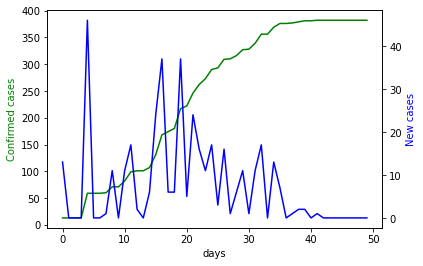

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,50)

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x,process,'g-')
ax2.plot(x,increment,'b-')

ax1.set_xlabel('days')
ax1.set_ylabel('Confirmed cases',color = 'g')
ax2.set_ylabel('New cases',color = 'b')

plt.show()

# 结果可视化

In [38]:
# 图像可视化
from folium.plugins import HeatMap

## 患者活动轨迹热点图(风险区域划分)

In [39]:
heat_data = []
# 最频繁出现的地点
# print(c_without_city.most_common(100))
for place in c_without_city.most_common(100):
    try:
        longitude,latitude = map(float,place[0][1].split(','))
        heat_data.append([latitude,longitude,place[1]])
    except:
        pass
# print(heat_data)
# 武汉市及附近
m = folium.Map(location=[45.75,126.65],zoom_start=11)
# 添加热点图层
HeatMap(heat_data).add_to(m)

m